In [7]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
from datetime import datetime, timedelta
import pandas as pd

In [8]:
pop_size = 3.3e8
# SARS-Cov-2 (COVID-19)
y = 1/14
sigma = 1/4.5

In [48]:
covid = {
    'disease_name': 'Covid',
    'date_start': datetime(2020,1,21),
    'date_end': datetime.now(),
    'R0': 2.5 ,
    'susceptible':329201263,
    'exposed':1,
    'infections':1,
    'natural_death_rate':0.00888,
    'disease_death_rate':0.02,
    'birth_rate':0.01199,
    'exposure_rate':0.01,
    'infectious_rate':0.01,
    'recovery_rate':0.01,
    'immunity_days': 182
}

SARS = {
    'disease_name': 'SARS',
    'date_start': datetime(2020,1,21),
    'date_end': datetime.now(),
    'R0': 1.875,
    'susceptible':329201263,
    'exposed':1,
    'infections':1,
    'natural_death_rate':0.00888,
    'disease_death_rate':0.095579,
    'birth_rate':0.01199,
    'exposure_rate':0.2,
    'infectious_rate':0.071429,
    'recovery_rate':0.011111,
     'immunity_days': 1096
}

Flu = {
    'disease_name': 'Flu',
    'date_start': datetime(2020,1,21),
    'date_end': datetime.now(),
    'R0': 1.5 ,
     'susceptible':329201263,
    'exposed':1,
    'infections':1,
    'natural_death_rate':0.00888,
    'disease_death_rate':0.009634,
    'birth_rate':0.01199,
    'exposure_rate':0.4,
    'infectious_rate':0.142857,
    'recovery_rate':0.166667,
    'immunity_days': 182
}
disease_df = [covid,SARS,Flu]


In [49]:
pd.DataFrame(disease_df)

,disease_name,date_start,date_end,R0,susceptible,exposed,infections,natural_death_rate,disease_death_rate,birth_rate,exposure_rate,infectious_rate,recovery_rate,immunity_days
0,Covid,2020-01-21,2020-11-21 21:30:45.344744,2.500,329201263,1,1,0.00888,0.020000,0.01199,0.01,0.010000,0.010000,182
1,SARS,2020-01-21,2020-11-21 21:30:45.344744,1.875,329201263,1,1,0.00888,0.095579,0.01199,0.20,0.071429,0.011111,1096
2,Flu,2020-01-21,2020-11-21 21:30:45.345744,1.500,329201263,1,1,0.00888,0.009634,0.01199,0.40,0.142857,0.166667,182


In [53]:
class EpidemicModel:
    def __init__(self,disease_name ,date_start,susceptible, exposed,infections, date_end,R0, natural_death_rate, disease_death_rate, birth_rate, exposure_rate, infectious_rate, recovery_rate, immunity_days):
        # x is state vector which contains (susceptible, exposed, infectious)
        self.disease_name = disease_name
        self.date_start = date_start
        self.date_end = date_end
        self.current_date = date_start
        self.R0 = R0
        self.susceptible = susceptible
        self.exposed =exposed
        self.infections = infections
        self.natural_death_rate = natural_death_rate
        self.disease_death_rate = disease_death_rate
        self.birth_rate = birth_rate
        self.exposure_rate = exposure_rate
        self.infectious_rate = infectious_rate
        self.recovery_rate = recovery_rate
        self.immunity_days = immunity_days
        self.immune = {}
        
        
     
    def main(self):
        time_elapsed = int((self.date_end - self.date_start).days)
        susceptible_pop = []
        exposed_pop = []
        infections_pop = []
        for t in range(time_elapsed):
            self.current_date = self.date_start + timedelta(days=t)
            #print('currentDate', self.current_date)
            self.born()
            self.natural_death()
            self.exposure()
            self.infected()
            self.die_from_disease()
            self.recover()
            self.check_still_immune()
            #self.decodeVector()
            #print('susceptible ', self.susceptible)
            #print('exposed', self.exposed)
            susceptible_pop.append(self.susceptible)
            exposed_pop.append(self.exposed)
            infections_pop.append(self.infections)
        return susceptible_pop, exposed_pop, infections_pop
    
    def check_still_immune(self):
        for recovered_date in list(self.immune):
            days_elapsed = (self.current_date - recovered_date).days
            if days_elapsed > 182:
                self.susceptible += self.immune[recovered_date]
                del self.immune[recovered_date]
               
    
            
    #def decodeVector(self):
        #if(self.x):
            #self.susceptible, self.exposed, self.infectious = self.x
    
    def exposure(self):
        n_exposed = self.susceptible * self.exposure_rate
        self.susceptible -= n_exposed
        self.exposed += n_exposed
    
    def infected(self):
        n_infected = self.exposed * self.infectious_rate
        self.exposed -= n_infected
        self.infections += n_infected
    
    def natural_death(self):
        random_d = random.randint(0,2)
        if(random_d == 0):
            self.susceptible *= (1-self.natural_death_rate)
        elif(random_d == 1):
            self.exposed *= (1-self.natural_death_rate)
        elif(random_d == 2):
            self.infections *= (1-self.natural_death_rate)
        vector[random_d] *= (1- self.natural_death_rate)
        self.x = vector
        
    def born(self):
        self.susceptible *= (1 + self.birth_rate)
        
    def die_from_disease(self):
        self.infections *= (1 - self.disease_death_rate)
        
    # def flys_in(self):
        # self.infections *= (1 + flys_in_rate)
        
    def recover(self):
        n_recovered = self.infections * self.recovery_rate
        self.infections -= n_recovered 
        self.immune[self.current_date] = n_recovered


In [54]:
covid_model = EpidemicModel(**covid)
covid_model.main()

AttributeError: 'EpidemicModel' object has no attribute 'x'

10532475.547536137


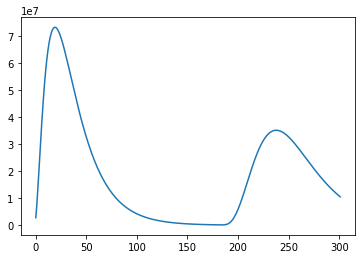

In [29]:
x = [329201263,1,1]
date_start= datetime(2020,1,21)
date_end = datetime.now()
disease_death_rate = 246000/11200000
exposure_rate = 1/4.5
infectious_rate = 1/24
recovery_rate =  1/14
model = EpidemicModel(x, date_start,date_end,R0 = 2.5, exposure_rate=exposure_rate, disease_death_rate = disease_death_rate, infectious_rate= infectious_rate, recovery_rate = recovery_rate)

susceptible_pop, exposed_pop, infections_pop  = model.main()
plt.plot(infections_pop)
#self.total_pop = 
print(infections_pop[-1])
